In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('/kaggle/input/coffee-sales/index.csv')
df.head(3)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate


<Axes: >

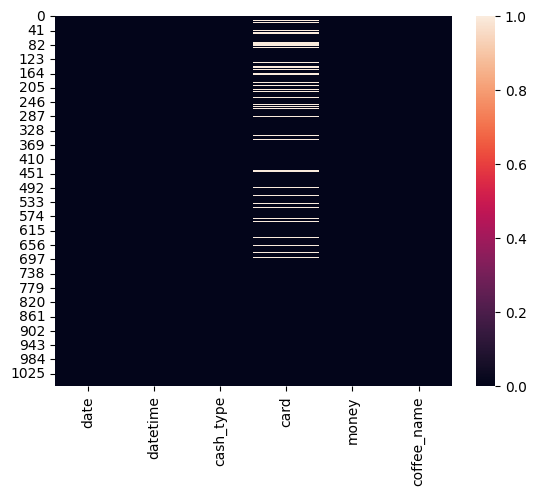

In [2]:
sns.heatmap(df.isnull())


In [3]:
#df[df.card.isna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1060 non-null   object 
 1   datetime     1060 non-null   object 
 2   cash_type    1060 non-null   object 
 3   card         971 non-null    object 
 4   money        1060 non-null   float64
 5   coffee_name  1060 non-null   object 
dtypes: float64(1), object(5)
memory usage: 49.8+ KB


In [4]:
#split date time column
df[['date','time']]=df['datetime'].str.split(' ',expand=True)
df.info() # find out the data type
#df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1060 non-null   object 
 1   datetime     1060 non-null   object 
 2   cash_type    1060 non-null   object 
 3   card         971 non-null    object 
 4   money        1060 non-null   float64
 5   coffee_name  1060 non-null   object 
 6   time         1060 non-null   object 
dtypes: float64(1), object(6)
memory usage: 58.1+ KB


In [5]:
#df.date=pd.to_datetime(df.date)
df['date']=pd.to_datetime(df['date']) # change data type
df['year']=df['date'].dt.year # create column year 
df['month']=df['date'].dt.month # create column month

In [6]:
df.head()

,date,datetime,cash_type,card,money,coffee_name,time,year,month
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,10:15:50.520,2024,3
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:19:22.539,2024,3
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:20:18.089,2024,3
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,13:46:33.006,2024,3
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,13:48:14.626,2024,3


In [7]:
# what type of coffee provides the largest income
df.groupby('coffee_name').money.sum().sort_values(ascending=False)

coffee_name
Latte                  8549.66
Americano with Milk    7876.02
Cappuccino             7037.76
Americano              4483.40
Hot Chocolate          2712.84
Cortado                2583.94
Cocoa                  1197.48
Espresso               1010.02
Name: money, dtype: float64

In [8]:
# what type of coffee is most often ordered
#df.head()
df.coffee_name.value_counts()

coffee_name
Americano with Milk    242
Latte                  229
Cappuccino             187
Americano              162
Cortado                 92
Hot Chocolate           72
Espresso                44
Cocoa                   32
Name: count, dtype: int64

In [9]:
# Coffee sales every month
df.groupby('month').money.sum()#.plot(kind='line')

month
3    7050.20
4    6720.56
5    9063.42
6    7758.76
7    4858.18
Name: money, dtype: float64

In [10]:
# Latte sales every month
df[df['coffee_name']=='Latte'].groupby('month').money.sum()#.plot(kind='line')

month
3    1874.50
4    1193.12
5    2198.00
6    1886.00
7    1398.04
Name: money, dtype: float64

In [11]:
# what time do the most customers come?
df.info() #check the type of the column
df['time'] = pd.to_datetime(df['time'])# change the data type
df['hours'] = df['time'].dt.hour # split the hour
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1060 non-null   datetime64[ns]
 1   datetime     1060 non-null   object        
 2   cash_type    1060 non-null   object        
 3   card         971 non-null    object        
 4   money        1060 non-null   float64       
 5   coffee_name  1060 non-null   object        
 6   time         1060 non-null   object        
 7   year         1060 non-null   int32         
 8   month        1060 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(5)
memory usage: 66.4+ KB


/tmp/ipykernel_18/239870833.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'])# change the data type


,date,datetime,cash_type,card,money,coffee_name,time,year,month,hours
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,2024-07-28 10:15:50.520,2024,3,10
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-07-28 12:19:22.539,2024,3,12
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-07-28 12:20:18.089,2024,3,12
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,2024-07-28 13:46:33.006,2024,3,13
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,2024-07-28 13:48:14.626,2024,3,13


In [12]:
# what time do the most customers come?
df['hours'].value_counts()

hours
10    128
11     95
19     92
12     83
13     75
16     75
18     74
14     72
17     72
21     65
15     64
20     43
9      40
8      39
22     32
7      11
Name: count, dtype: int64